# AIMS



The purpose of this notebook to have a better understanding of how the recent concern in the world in general and data analytic have shaped the community these last few years.<br> Along this notebook I will try to see  how:
  * the #METOO has change the number of woman in the field and bring up a more balanced workforce
  * the emergence of MOOC and other online learnings have changed the qualification hold by people working in the field
  * which language are becoming more popular with a special emphasis on R vs Python

To answer these questions, the stakeover flow surveys from 2017 until 2019 will be analysed and compared 
    

<a id='ToC' >
    </a>
    
   * [Definition of the function](#fun)
   * [Data Preparation](#data)
   * [Analysis](#ana)
     
    

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

**Loading the data in**

In [59]:
df_2017 = pd.read_csv('survey_results_public2017.csv')
df_2018 = pd.read_csv('survey_results_public2018.csv', dtype=str)
df_2019 = pd.read_csv('survey_results_public2019.csv')

<a id='fun' >
    </a>
    

**Functions used in the notebook**

In [60]:
def create_dic(df, field):
    
    """
    The answer of the questions allowing multiple answers are recorded as a string with each answer separated by a ';'. 
    This functions breakdown the different answer into their component and count how many time each single answer has been given
    
    input : df: name of the dataframe
            field: name of the variable to extract the anwser
            
    output: dict_:  a dictionnary with the different value for the answer as a key and the percentage of people chosing that
                    that answer as the value associated with the key
    
    
    """
    dict_ = {}
    for value in df[field].fillna('none').tolist():
        #take this opportunity to standarise the answer between the different year
        value = value.replace('HTML;CSS', 'HTML/CSS')
        value = value.replace('Bash/Shell/PowerShell', 'Bash/Shell')
        
        listy = value.split(';')
        
        #creating an entry for each element or incrementing the count by 1
        for elem in listy:
            elem = elem.strip()
            if elem in dict_.keys():
                dict_[elem] += 1
            else:
                dict_[elem] = 1
                
    # calculating the percentage            
    for k in dict_.keys():
        dict_[k] = dict_[k]/df.shape[0]
    return dict_
        

In [61]:
def simplify_gender(df):
    """
    in the different survey, the answer for the response gender have been recorded differently, this funciton standarize 
    the answer and create (in place) a new variable 'Gender_S'
    
    input: df: a dataframe containing the gender variable
    output: the dataframe with a new variable 'Gender_S' contianing the standarized answer for gender
    
    """
    gender_dic = {}
    for value in df['Gender'].unique():
        gender_dic[value] = 'Other'
    gender_dic['Man'] = 'Man'
    gender_dic['Male'] = 'Man'
    gender_dic['Woman'] = 'Woman'
    gender_dic['Female'] = 'Woman'
    gender_dic[np.nan] = 'Missing'
    df['Gender_S'] = [gender_dic[x] for x in df['Gender']]

In [62]:
def dict_to_graph(dict_, n=10):
    """
    This function create a bar chart with the n-highest answer given for the question
    
    input: dict_ :dictionnary output by the function create_dic()
    
    """

    listy = [(dict_[x],x) for x in dict_.keys()]
    listy = sorted(listy, reverse=True)
    names = [name for pct, name in listy][:n]
    pct = [pct for pct, name in listy][:n]
    plt.bar(range(len(names)), pct, tick_label=names )
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    plt.show()

In [63]:
def dict_to_df(dict_, year):
    """       
    This function create a dataframe with the percentage of people giving each answer  for the question
    
    input:  dict_ :dictionnary output by the function create_dic()
            year  : string used as label for the variable containing the percentage of people replying that answer 
    output: a dataframe with the different ansers as index and the percentage of people replying it
    """
 
    listy = [(dict_[x], x) for x in dict_.keys()]
    names = [name for pct, name in listy]
    pct = [pct for pct, name in listy]
    df_ = pd.DataFrame({' ':names, year:pct})
    df_.set_index(' ', inplace=True)
    return df_

In [64]:
def compare_dict(list_of_dict, list_of_year, n=10):
    """
    This function create a bar chart comparing the n-highest answer given for the question along the different year
    
    input:     list_of_dict :  list of dictionnary output by the function create_dic()
        
               list_of_year  : list of string used as label for the variable containing the percentage
                               of people replying that answer 
                               
    output: a dataframe with the different ansers as index and the percentage of people replying it
    
    """    
        
    counter = 0
    df = pd.DataFrame()
    for dict_, year in zip(list_of_dict, list_of_year):
        df_ = dict_to_df(dict_, year)
        df = df_.join(df,how='outer')
    df.sort_values([year], ascending=False, inplace=True)
    df_short = df[:n]
    for columns in df.columns.tolist():
        plt.bar(range(counter, df_short.shape[0]*len(list_of_dict)+counter, len(list_of_dict) ), 
                df_short[columns], 
                label=columns )
        counter += 1
        
    #adding a label in the middle of the different bars
    
    plt.bar(np.array(range(counter-1, df_short.shape[0]*len(list_of_dict)+counter-1, len(list_of_dict) ))-(counter-1)/2,
            0, #no value are needed
            tick_label=df_short.index )
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')    
    plt.legend()    
    plt.show()
    return(df)

In [65]:
def filter_df(df, variable, string):
    """
    This function filter a dataframe to find people that have answer at least a specific answer to a question
    input : df:       name of the dataframe
            variable: name of the variable where to look for the answer
            string :  value of the answer to look for
            
    output: a dataframe contianing only the people where the specific answer has been found    
    
    """
    
    filtering = []
    for value in df[variable].fillna('none').tolist():
        sety = set([charac.strip() for charac in value.split(';')])
        filtering += [sety.issuperset(set([string]))]
    return df[filtering]

<a id='data' >
    
   </a>

# Data preparation

As for the different datasets used, the answers available were different (for example 'male' vs 'man,) a standardization of the the data across the different datasets is needed in order to compare easily the different years.

In [66]:
simplify_gender(df_2017)
simplify_gender(df_2018)
simplify_gender(df_2019)

In [67]:
df_2019['Education'] = [education.split('(')[0] for education in df_2019['EdLevel'].fillna('I prefer not to answer')\
                        .str.replace("’s degree","'s degree")]
df_2019['Education'] = df_2019['Education'].str.replace('Other doctoral degree','Doctoral degree')
df_2018['Education'] = [education.split('(')[0] for education in df_2018['FormalEducation'].fillna('I prefer not to answer')\
                        .str.replace("’s degree","'s degree")]
df_2018['Education'] = df_2018['Education'].str.replace('Other doctoral degree','Doctoral degree')
df_2017['Education'] = [education.split('(')[0] for education in df_2017['FormalEducation']]
df_2017['Education'] = df_2017['Education'].str.\
                        replace("Some college/university study without earning a bachelor's degree",
                                "Some study without\n earning a degree" )
df_2018['Education'] = df_2018['Education'].str.\
                        replace("Some college/university study without earning a degree",
                                "Some study without\n earning a degree" )
df_2019['Education'] = df_2019['Education'].str.\
                        replace("Some college/university study without earning a degree",
                                "Some study without\n earning a degree" )

In [68]:
df_2017['Employment'] = df_2017['EmploymentStatus']
df_2017['LanguageWorkedWith'] = df_2017['HaveWorkedLanguage']
df_2017['LanguageDesireNextYear'] = df_2017['WantWorkLanguage']

<a id='ana' >
    </a>

# Analysis

## Evolution of the number of women per men in the field

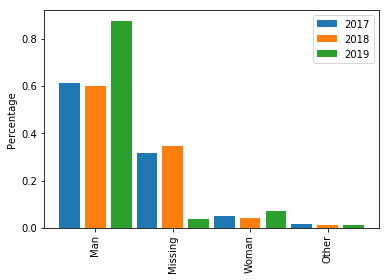

,2017,2018,2019
,,,
Man,0.614668,0.601467,0.876647
Missing,0.318046,0.347843,0.039119
Woman,0.050592,0.040716,0.071375
Other,0.016695,0.009974,0.012860


In [69]:
list_of_dic = []
for dataf in [df_2019, df_2018, df_2017]:
    list_of_dic += [create_dic(dataf, 'Gender_S')]
gender = compare_dict(list_of_dic, ['2019', '2018', '2017'])
gender

The major change is in fact the reduction of people not wanting to tell their gender. <br> As the the percentage of women is following the same trend as the percentage of men, we can calculate the ratio men/women to see if there are been any change in the population regarding the gender

In [70]:
gt = gender.transpose()
gt['ratio Man/Woman'] = gt.Man/gt.Woman
gt['ratio Man/Woman']

2017    12.149615
2018    14.772174
2019    12.282314
Name: ratio Man/Woman, dtype: float64

We can see that the ratio men/women has sligthly increased in 2018 for falling down in 2019 to the same value as it was in 2019. It doesn't seem that the #METOO movement had any  impact in the field

## Evolution of the qualifications

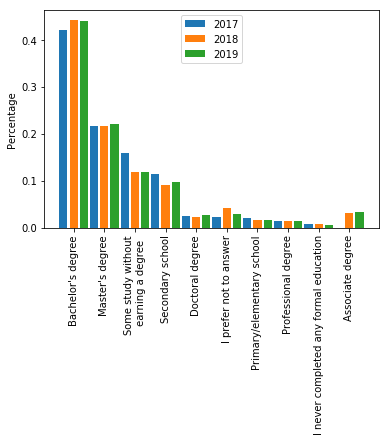

,2017,2018,2019
,,,
Bachelor's degree,0.420474,0.441647,0.440287
Master's degree,0.216785,0.216438,0.220166
Some study without\n earning a degree,0.158176,0.118456,0.118155
Secondary school,0.114960,0.090547,0.097229
Doctoral degree,0.025451,0.022396,0.027362
I prefer not to answer,0.021579,0.042001,0.028048
Primary/elementary school,0.020373,0.016752,0.015999
Professional degree,0.013913,0.014638,0.013478
I never completed any formal education,0.008289,0.007081,0.006222


In [71]:
list_of_dic = []
for dataf in [df_2019, df_2018, df_2017]:
    list_of_dic += [create_dic(dataf, 'Education')]
educ = compare_dict(list_of_dic, ['2019', '2018', '2017'])
educ

The three main categories evolving from 2017 to 2019 are:
  * 'Some study without earning a degree' that decreased by 4% between 2017 and 2019
  * 'Bachelor's degree' that increase by 2% between 2017 and 2018
  * 'Associate degree' that wasn't available in the survey before 2018 and scores 3% in 2018 and 2019<br>
  
These changes are really not important and most of them could be due to the introduction of a new possible answer

## Evolution of  the popularity of the different languages

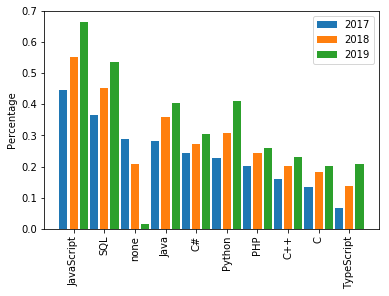

In [72]:
list_of_dic = []
for dataf in [df_2019, df_2018, df_2017]:
    list_of_dic += [create_dic(dataf, 'LanguageWorkedWith')]
language = compare_dict(list_of_dic, ['2019', '2018', '2017'])

All languages seem more popular with time. Quite surprisingly, 28% of the respondants seem to have not worked with any languages in 2017. This number falls down to 1.5% in 2019. this couldeither reflect an increase in populatity in coding but it could also be due to the strategy changes in the survey. Let see what are the trends if we remove the non-coding population

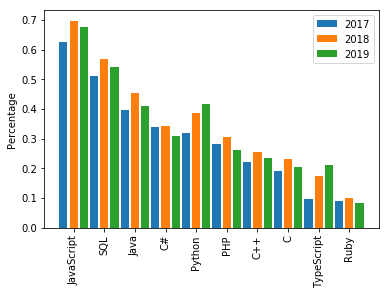

In [73]:
list_of_dic = []
for dataf in [df_2019, df_2018, df_2017]:
    data_filled = dataf.fillna('none')
    data_selected = data_filled[data_filled.LanguageWorkedWith !='none']
    list_of_dic += [create_dic(data_selected, 'LanguageWorkedWith')]
language_no_missing = compare_dict(list_of_dic, ['2019', '2018', '2017'])

Among the top 10 languages used, only the number of users of Python and TypeScript have increased each year. The language people work with may not really reflect their choice as it may be due to working environment contraint; better looking at which language people are hoping to work with

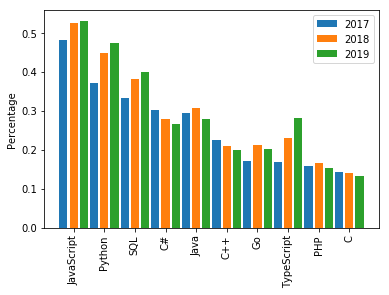

In [74]:
list_of_dic = []
for dataf in [df_2019, df_2018, df_2017]:
    data_filled = dataf.fillna('none')
    data_selected = data_filled[data_filled.LanguageDesireNextYear !='none']
    list_of_dic += [create_dic(data_selected, 'LanguageDesireNextYear')]
next_language = compare_dict(list_of_dic, ['2019', '2018', '2017'])

Looking at the top 10 languages people want to work with give a very similar picture with the addition of JavaScript and SQL to the list of language with increased popularity

# Where is R?

One thing that I was expecting to see is the famous war between Python and R but R (16th) is far behind Python (2nd). Could it be that the R population is just not very present on stackoverflow? how this subset of the population differs from the Python population ?

In [75]:
df_P_2017 = filter_df(df_2017, 'LanguageWorkedWith', 'Python')
df_R_2017 = filter_df(df_2017, 'LanguageWorkedWith', 'R')
df_P_2018 = filter_df(df_2018, 'LanguageWorkedWith', 'Python')
df_R_2018 = filter_df(df_2018, 'LanguageWorkedWith', 'R')
df_P_2019 = filter_df(df_2019, 'LanguageWorkedWith', 'Python')
df_R_2019 = filter_df(df_2019, 'LanguageWorkedWith', 'R')

	Desired language for people working with R


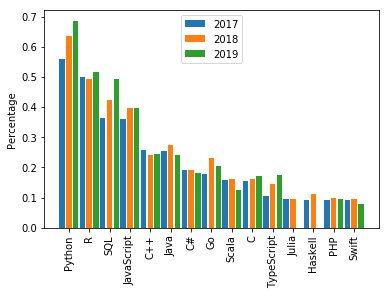

  Desired language for people working with Python


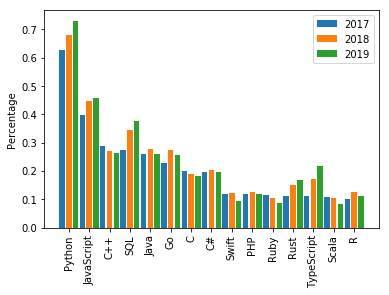

In [76]:
print('\tDesired language for people working with R')
R_dic = compare_dict([create_dic(df_R_2019, 'LanguageDesireNextYear'),
                      create_dic(df_R_2018, 'LanguageDesireNextYear'),
                      create_dic(df_R_2017, 'LanguageDesireNextYear')],
                     ['2019', '2018', '2017'],n=15)

print('  Desired language for people working with Python')

P_dict = compare_dict([create_dic(df_P_2019, 'LanguageDesireNextYear'),
                       create_dic(df_P_2018, 'LanguageDesireNextYear'),
                       create_dic(df_P_2017, 'LanguageDesireNextYear')], 
                      ['2019','2018','2017'],n=15)


While the number of people wanting to work with python in the future increase year-on-year to reach 70% regardless if they come from a Python or an R background, the proportion of people wanting to work with R is quite steady around 50% for the people from an R background and around 10 % for people from a python background.<br>
As R doesn't seem to attract a lot of people where do they come from? could it be their education?

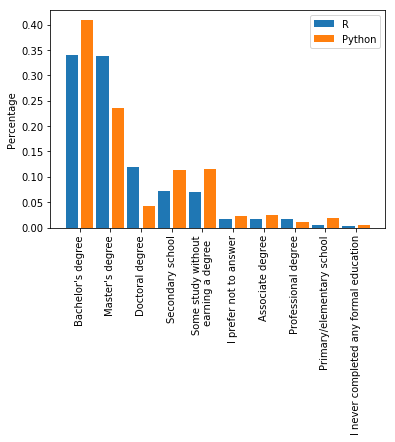

In [77]:
educ_R_vs_P = compare_dict([create_dic(df_P_2019, 'Education'),
                            create_dic(df_R_2019, 'Education')], 
                           ['Python', 'R'])

We can see that people with a higher degree (Master or PhD) are over-represented in the population using R compare to the population using Python suggesting that the education may play a role in the first choice of the language to code with